<a href="https://colab.research.google.com/github/renzotaco/datascience/blob/main/DM_MercariJP_subcategoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive 

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
train=drive.CreateFile({'id':'1mN96UKMA2lcYq7vd5_MAPG9ybttjzIIM'})
train.GetContentFile('train.tsv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('train.tsv', sep='\t')
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)

(1186028, 8) (296507, 8)


In [6]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186028 entries, 0 to 1186027
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1186028 non-null  int64  
 1   name               1186028 non-null  object 
 2   item_condition_id  1186028 non-null  int64  
 3   category_name      1180953 non-null  object 
 4   brand_name         679756 non-null   object 
 5   price              1186028 non-null  float64
 6   shipping           1186028 non-null  int64  
 7   item_description   1186026 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


In [11]:
train['price'].describe()

count    1.186028e+06
mean     2.672386e+01
std      3.844205e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

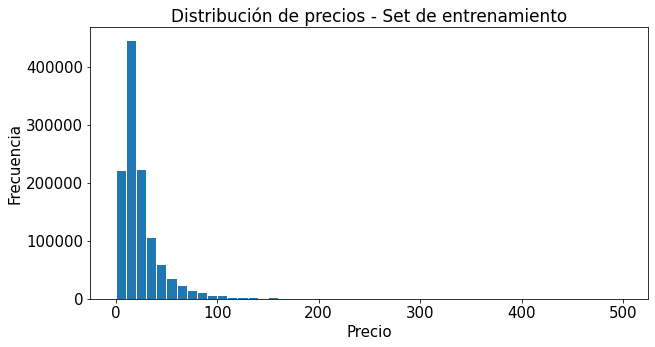

In [12]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,500])
plt.xlabel('Precio', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribución de precios - Set de entrenamiento', fontsize=17)
plt.show()

In [13]:
train['shipping'].value_counts(normalize=True)*100

0    55.267667
1    44.732333
Name: shipping, dtype: float64

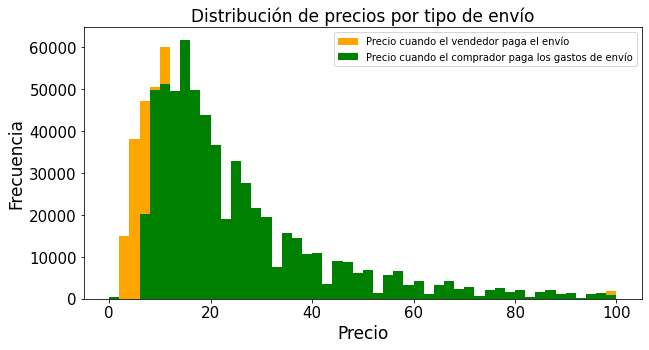

In [14]:
shipping_fee_by_seller = train.loc[train.shipping==1, 'price']
shipping_fee_by_buyer = train.loc[train.shipping==0, 'price']

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_fee_by_seller, color='Orange', alpha=1.0, bins=50, range=[0,100], label='Precio cuando el vendedor paga el envío')
ax.hist(shipping_fee_by_buyer, color='Green', alpha=1.0, bins=50, range=[0,100], label='Precio cuando el comprador paga los gastos de envío')
ax.set(title='Comparación de histogramas', ylabel='% of Dataset in Bin')
plt.xlabel('Precio', fontsize=17)
plt.ylabel('Frecuencia', fontsize=17)
plt.title('Distribución de precios por tipo de envío', fontsize=17)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

In [15]:
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.194511
2    25.323264
3    29.166934
4     2.153153
5     0.162138
Name: item_condition_id, dtype: float64

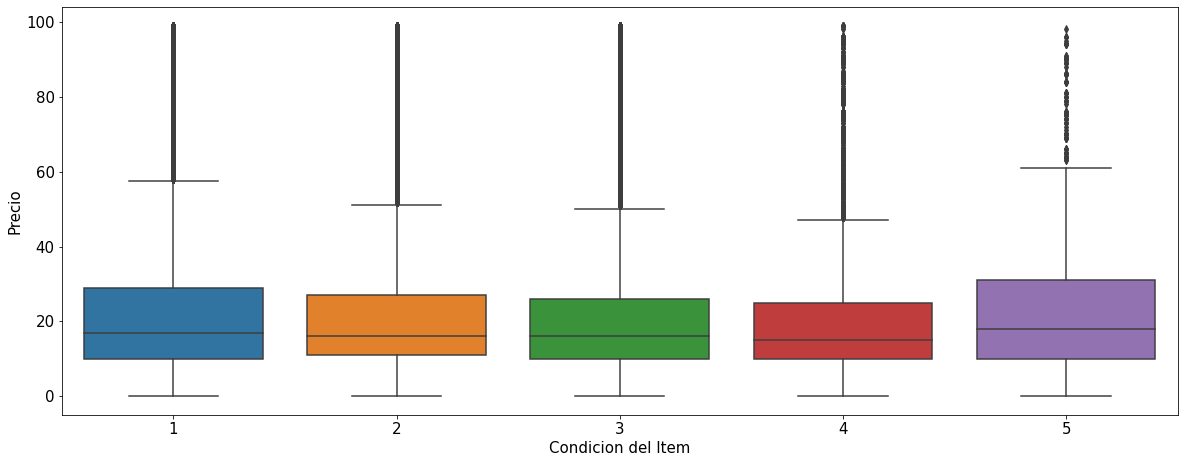

In [16]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Condicion del Item', fontsize=15)
plt.ylabel('Precio', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
(train['category_name'].value_counts(normalize=True)*100).head(15)

Women/Athletic Apparel/Pants, Tights, Leggings                 4.060365
Women/Tops & Blouses/T-Shirts                                  3.134841
Beauty/Makeup/Face                                             2.321684
Beauty/Makeup/Lips                                             2.025398
Electronics/Video Games & Consoles/Games                       1.798039
Beauty/Makeup/Eyes                                             1.720390
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    1.675511
Women/Underwear/Bras                                           1.439346
Women/Tops & Blouses/Tank, Cami                                1.381511
Women/Tops & Blouses/Blouse                                    1.374314
Women/Dresses/Above Knee, Mini                                 1.356955
Women/Jewelry/Necklaces                                        1.348572
Women/Athletic Apparel/Shorts                                  1.328419
Beauty/Makeup/Makeup Palettes                                  1

In [18]:
def split_cat(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
train['main_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['main_cat'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [19]:
def lowercase_categorical_features_train(feature):
    original_list = list(train[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list
  
def lowercase_categorical_features_test(feature):
    original_list = list(test[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list

In [20]:
train['subcat_1'] = lowercase_categorical_features_train('subcat_1')
train['subcat_2'] = lowercase_categorical_features_train('subcat_2')
train['main_cat'] = lowercase_categorical_features_train('main_cat')

test['subcat_1'] = lowercase_categorical_features_test('subcat_1')
test['subcat_2'] = lowercase_categorical_features_test('subcat_2')
test['main_cat'] = lowercase_categorical_features_test('main_cat')

In [21]:
print("There are %d unique main categories." % train['main_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

There are 11 unique main categories.
There are 114 unique first sub-categories.
There are 863 unique second sub-categories.


In [22]:
train['main_cat'].value_counts(normalize=True)*100

women                     44.805350
beauty                    14.035503
kids                      11.561784
electronics                8.265994
men                        6.311740
home                       4.595760
vintage & collectibles     3.138374
other                      3.065189
handmade                   2.083340
sports & outdoors          1.709066
category unknown           0.427899
Name: main_cat, dtype: float64

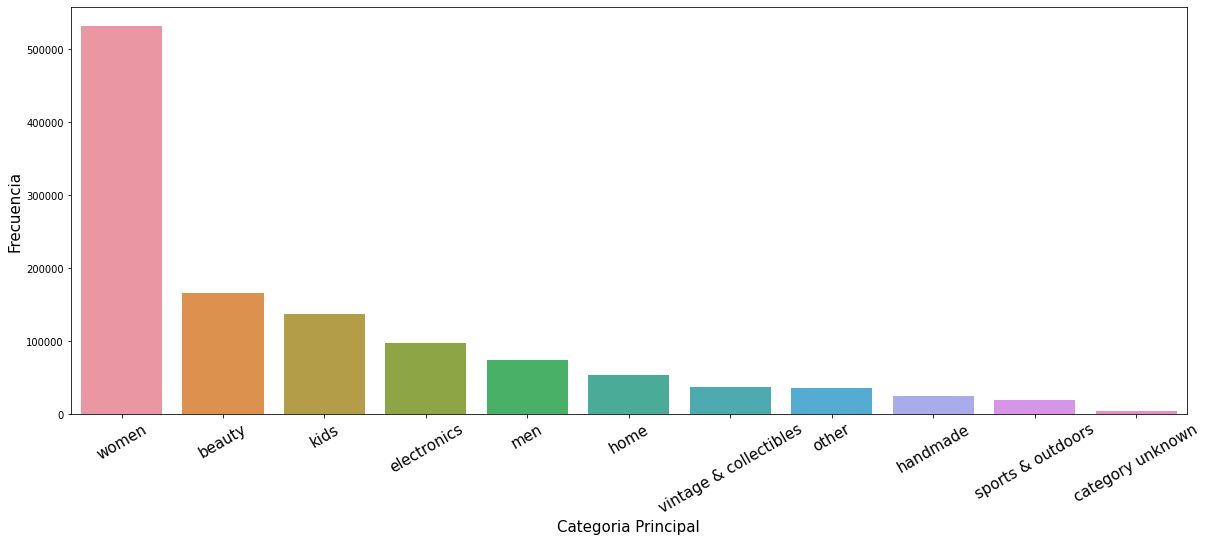

In [23]:
fig, ax = plt.subplots(figsize=(20,7.5))
sns.countplot(train['main_cat'], ax=ax, order=(train['main_cat'].value_counts()).index)
plt.xlabel('Categoria Principal', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.show()

In [25]:
main_cat = train.groupby('main_cat')
main_cat_median = pd.DataFrame(main_cat['price'].median())
main_cat_median = main_cat_median.sort_values(ascending=True, by='price')
main_cat_median

,price
main_cat,
handmade,12.0
kids,14.0
other,14.0
beauty,15.0
electronics,15.0
category unknown,16.0
sports & outdoors,16.0
vintage & collectibles,16.0
home,18.0


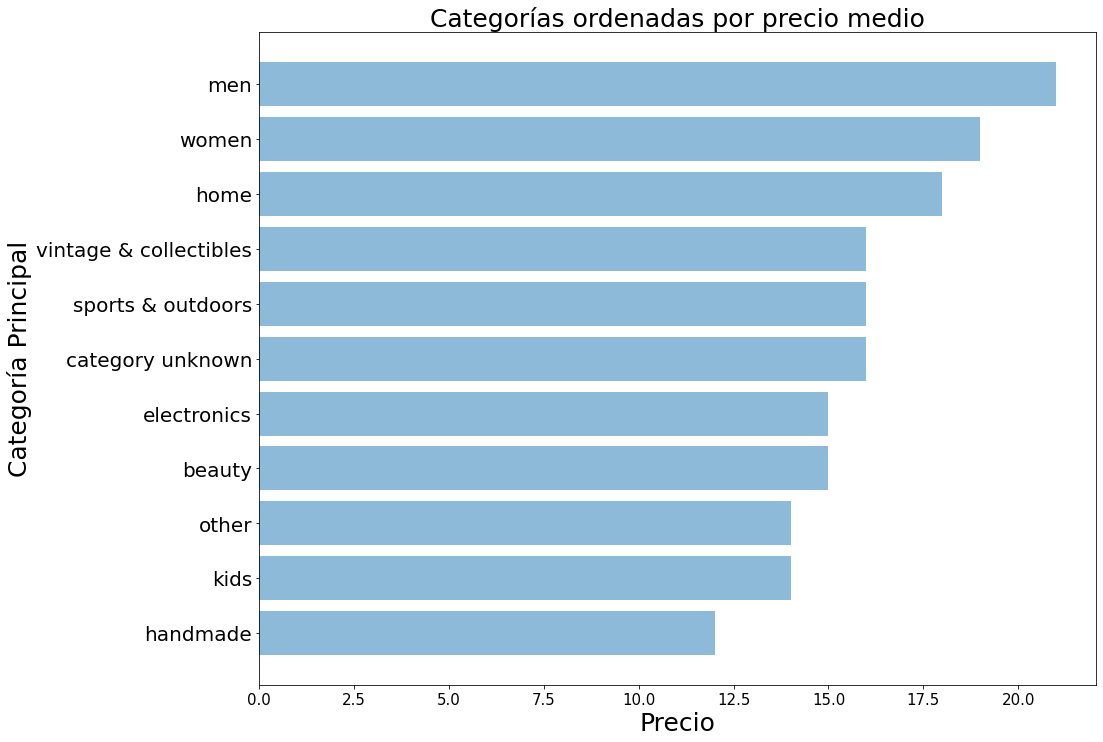

In [26]:
plt.figure(figsize=(15,12))
plt.barh(range(0,len(main_cat_median)), main_cat_median['price'], align='center', alpha=0.5)
plt.yticks(range(0,len(main_cat_median)), main_cat_median.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Categorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Categoría Principal', fontsize=25)
plt.show()

In [27]:
train['subcat_1'].value_counts(normalize=True).head(10)

athletic apparel             0.090494
makeup                       0.084148
tops & blouses               0.072152
shoes                        0.067818
jewelry                      0.041684
toys                         0.039228
cell phones & accessories    0.035843
women's handbags             0.030885
dresses                      0.030855
women's accessories          0.028466
Name: subcat_1, dtype: float64

In [28]:
paper = train[train['subcat_1']=='paper goods']
paper.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
442,442,Bundle for lexi,1,Handmade/Paper Goods/Sticker,NaN,7.0,1,these are handmade NEW AND IMPROVED STICKER MA...,handmade,paper goods,sticker
904,904,40 Thank you stickers,1,Handmade/Paper Goods/Sticker,NaN,3.0,1,20 smiley face 20 heart stickers You will rece...,handmade,paper goods,sticker
1127,1127,Ohio state deer antler decal,1,Handmade/Paper Goods/Sticker,NaN,7.0,0,Vinyl decal comes with high quality transfer t...,handmade,paper goods,sticker
1318,1318,10 Cricut Explore Pens,1,Handmade/Paper Goods/Scrapbooking,NaN,21.0,0,10 Cricut Pens- 2 packages! For Cricut Explore...,handmade,paper goods,scrapbooking
1329,1329,Tumblr Stickers: read description,1,Handmade/Paper Goods/Sticker,NaN,3.0,1,These are the stickers I have left besides the...,handmade,paper goods,sticker
1436,1436,Probably whiskey vinyl decal sticker,1,Handmade/Paper Goods/Sticker,NaN,9.0,0,"The size is 3"" leave me a message on a color. ...",handmade,paper goods,sticker


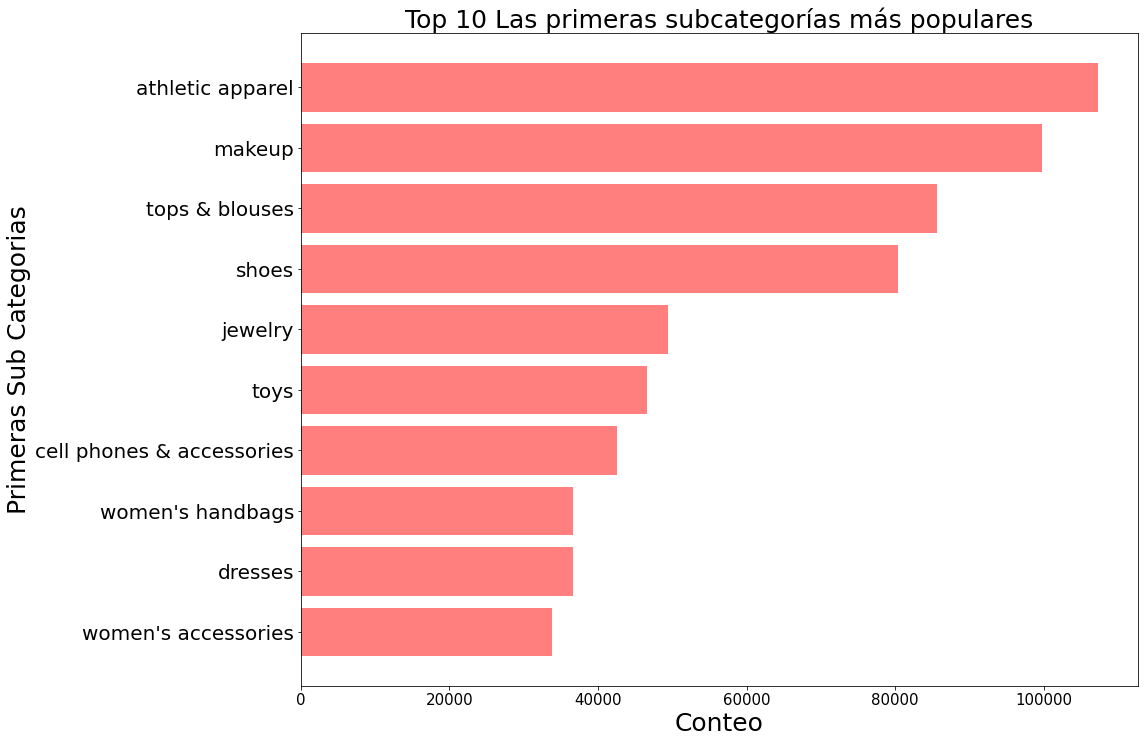

In [29]:
x = train['subcat_1'].value_counts().index[:10]
y = train['subcat_1'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Las primeras subcategorías más populares', fontsize=25)
plt.xlabel('Conteo', fontsize=25)
plt.ylabel('Primeras Sub Categorias', fontsize=25)
plt.show()

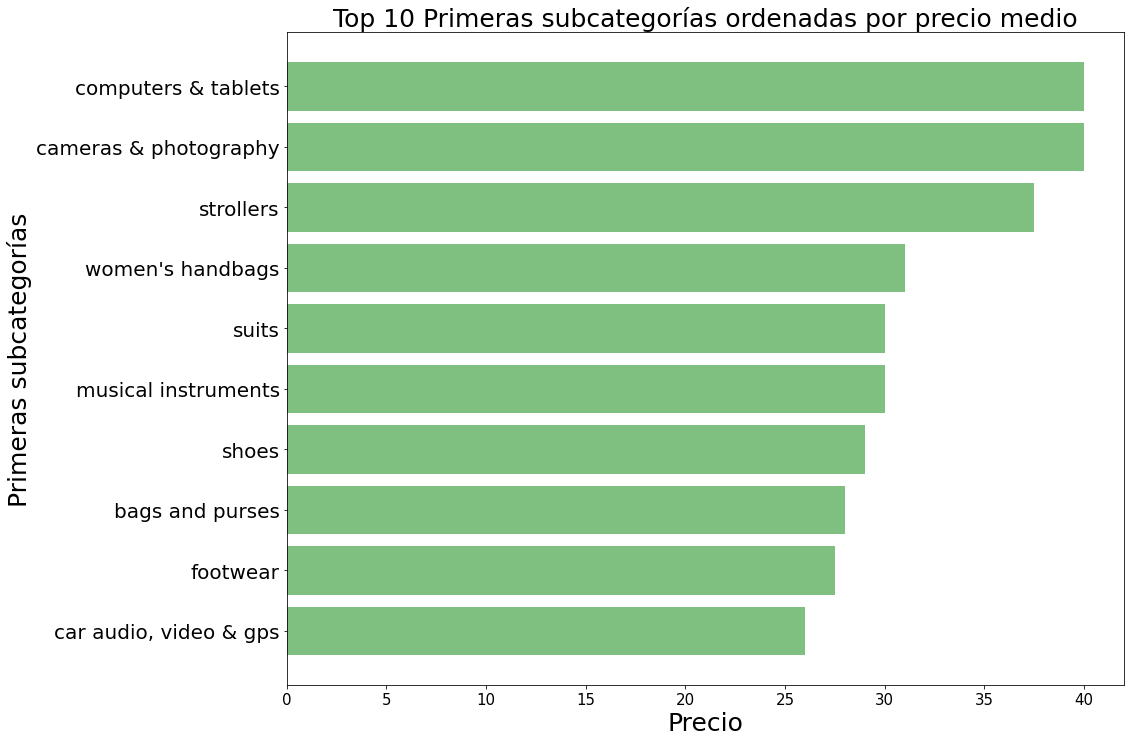

In [30]:
subcat_1 = train.groupby('subcat_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=True, by='price')
subcat_1_median_top = subcat_1_median[-10:]
subcat_1_median_bottom = subcat_1_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_1_median_top)), subcat_1_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_1_median_top)), subcat_1_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Primeras subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Primeras subcategorías', fontsize=25)
plt.show()

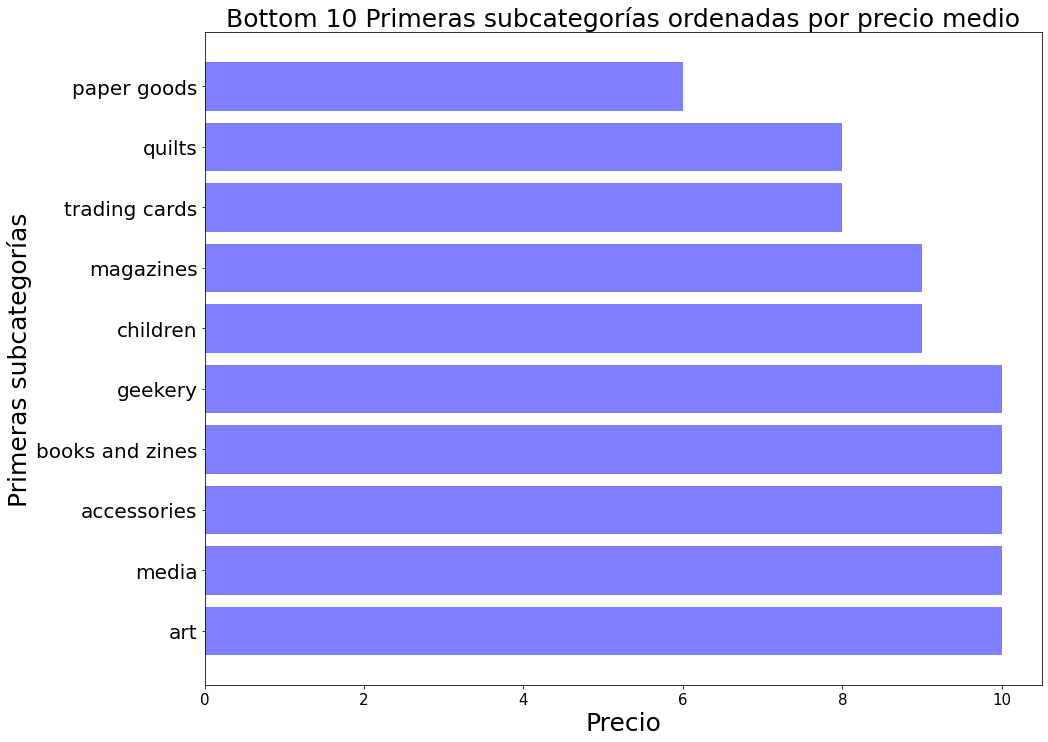

In [31]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 Primeras subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Primeras subcategorías', fontsize=25)
plt.show()

In [32]:
stand = train[train['subcat_2']=='Standard']
stand

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2


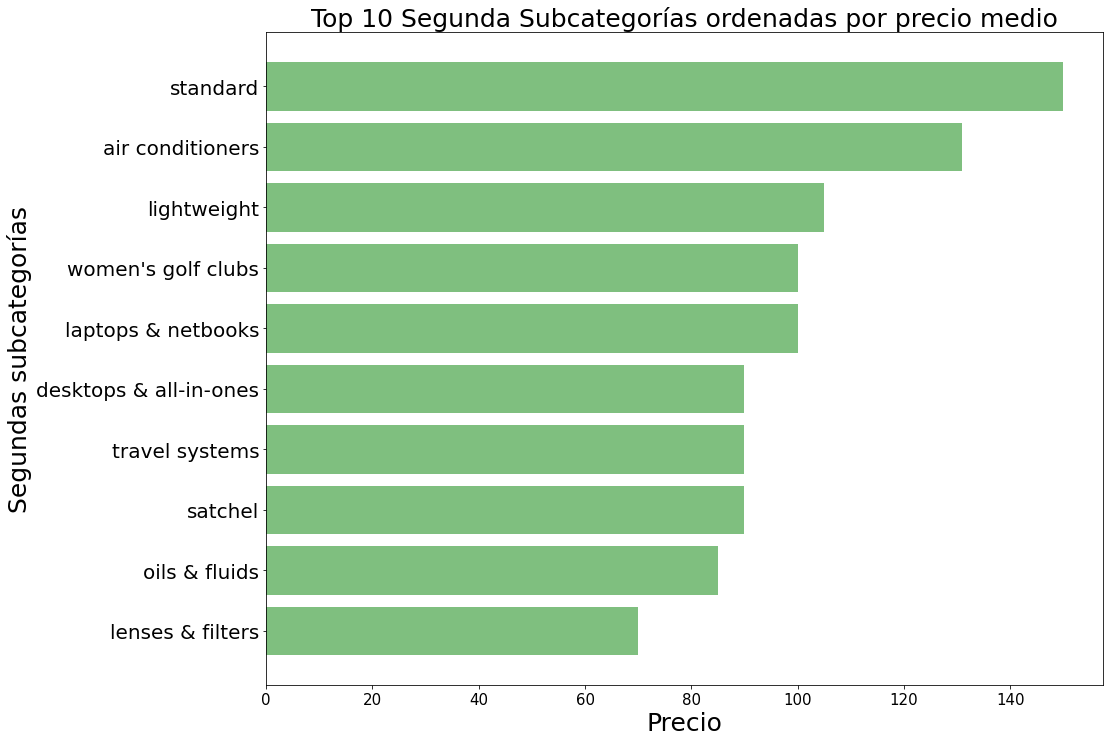

In [33]:
subcat_2 = train.groupby('subcat_2')
subcat_2_median = pd.DataFrame(subcat_2['price'].median())
subcat_2_median = subcat_2_median.sort_values(ascending=True, by='price')
subcat_2_median_top = subcat_2_median[-10:]
subcat_2_median_bottom = subcat_2_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_2_median_top)), subcat_2_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_2_median_top)), subcat_2_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Segunda Subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Segundas subcategorías', fontsize=25)
plt.show()